# Kaggle - House Prices: Advanced Regression Techniques

## Overview

Developing a machine learning model to predict housing prices from the wide array of features in the [Ames Housing dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

The metric used for evaluation will be the Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price.

Applying lessons from [Kaggle machine learning tutorial](https://www.kaggle.com/learn/maching_learning), (see levels_1_2.ipynb for completed tutorial), [Hands-On Machine Learning](https://github.com/ageron/handson-ml) and other sources.

## Brainstorm:
1. Review tutorial
2. Categorical pipeline / pipeline merging
3. Regularization
4. Feature analysis
5. Correlations
6. Additional models
...

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
pd.set_option('max_rows', 9)
pd.set_option('max_columns', 100)
pd.options.display.float_format = '{:,.3f}'.format

## Data exploration

In [2]:
# Loading training and test sets 
  # provided by Kaggle
  # test data does not include outcome variable
train_raw = pd.read_csv('data/train.csv')
test_raw = pd.read_csv('data/test.csv')

In [3]:
# Training data info
print('train:', train_raw.shape)
print('test:', test_raw.shape)

train: (1460, 81)
test: (1459, 80)


In [4]:
# Summary statistics for numerical training data
train_raw.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,"1,460.000","1,460.000","1,201.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,452.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,379.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000","1,460.000"
mean,730.500,56.897,70.050,"10,516.828",6.099,5.575,"1,971.268","1,984.866",103.685,443.640,46.549,567.240,"1,057.429","1,162.627",346.992,5.845,"1,515.464",0.425,0.058,1.565,0.383,2.866,1.047,6.518,0.613,"1,978.506",1.767,472.980,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,"2,007.816","180,921.196"
std,421.610,42.301,24.285,"9,981.265",1.383,1.113,30.203,20.645,181.066,456.098,161.319,441.867,438.705,386.588,436.528,48.623,525.480,0.519,0.239,0.551,0.503,0.816,0.220,1.625,0.645,24.690,0.747,213.805,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,"79,442.503"
min,1.000,20.000,21.000,"1,300.000",1.000,1.000,"1,872.000","1,950.000",0.000,0.000,0.000,0.000,0.000,334.000,0.000,0.000,334.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,"1,900.000",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,"2,006.000","34,900.000"
25%,365.750,20.000,59.000,"7,553.500",5.000,5.000,"1,954.000","1,967.000",0.000,0.000,0.000,223.000,795.750,882.000,0.000,0.000,"1,129.500",0.000,0.000,1.000,0.000,2.000,1.000,5.000,0.000,"1,961.000",1.000,334.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,"2,007.000","129,975.000"
50%,730.500,50.000,69.000,"9,478.500",6.000,5.000,"1,973.000","1,994.000",0.000,383.500,0.000,477.500,991.500,"1,087.000",0.000,0.000,"1,464.000",0.000,0.000,2.000,0.000,3.000,1.000,6.000,1.000,"1,980.000",2.000,480.000,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,"2,008.000","163,000.000"
75%,"1,095.250",70.000,80.000,"11,601.500",7.000,6.000,"2,000.000","2,004.000",166.000,712.250,0.000,808.000,"1,298.250","1,391.250",728.000,0.000,"1,776.750",1.000,0.000,2.000,1.000,3.000,1.000,7.000,1.000,"2,002.000",2.000,576.000,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,"2,009.000","214,000.000"
max,"1,460.000",190.000,313.000,"215,245.000",10.000,9.000,"2,010.000","2,010.000","1,600.000","5,644.000","1,474.000","2,336.000","6,110.000","4,692.000","2,065.000",572.000,"5,642.000",3.000,2.000,3.000,2.000,8.000,3.000,14.000,3.000,"2,010.000",4.000,"1,418.000",857.000,547.000,552.000,508.000,480.000,738.000,"15,500.000",12.000,"2,010.000","755,000.000"


In [5]:
# Training vs test data
  # Quick relative difference metric for numerical attributes
rel_diff = np.abs((test_raw.describe().loc['mean', :] - 
                   train_raw.describe().loc['mean', :]) /
                  ((test_raw.describe().loc['mean', :] +
                    train_raw.describe().loc['mean', :]) / 2))

rel_diff.loc[rel_diff > 0.2].sort_values(ascending=False)

Id             0.999
3SsnPorch      0.621
LowQualFinSF   0.490
PoolArea       0.451
MiscVal        0.289
Name: mean, dtype: float64

    Id should be excluded from analysis
    A few other attributes have large relative differences.

In [6]:
# Summary statistics for categorical training data
test_raw.select_dtypes(include='object').describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1459,107,1459,1459,1457,1459,1459,1459,1459,1459,1459,1459,1459,1459,1458,1458,1443,1459,1459,1459,1415,1414,1415,1417,1417,1459,1459,1459,1459,1458,1457,729,1383,1381,1381,1381,1459,3,290,51,1458,1459
unique,5,2,2,4,4,1,5,3,25,9,5,5,7,6,4,13,15,4,4,5,6,4,4,4,6,6,4,5,2,4,4,7,5,6,3,4,5,3,2,4,3,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1114,1453,70,934,1311,1457,1081,1396,218,1251,1444,1205,745,1169,1442,510,510,878,892,1256,661,634,1295,951,431,1237,1446,752,1358,1337,757,1357,364,853,625,1293,1328,1301,2,172,46,1258,1204


In [7]:
# Columns with NAs 
  # Number of NA enteries, Proportion of NAs, dtype of column

with pd.option_context('max_rows', None):
    (display
     (train_raw.isnull().sum().loc[train_raw.isnull().sum() > 0]
      .sort_values(ascending=False)
      .to_frame(name = 'NAs')
      .assign(Prop_NA = lambda srs: (srs['NAs']) / len(train_raw))
      .join
       (train_raw.loc[:, train_raw.count() < len(train_raw)]
        .dtypes
        .to_frame(name='dtype')
       )
     )
    )

,NAs,Prop_NA,dtype
PoolQC,1453,0.995,object
MiscFeature,1406,0.963,object
Alley,1369,0.938,object
Fence,1179,0.808,object
FireplaceQu,690,0.473,object
LotFrontage,259,0.177,float64
GarageYrBlt,81,0.055,float64
GarageType,81,0.055,object
GarageFinish,81,0.055,object
GarageQual,81,0.055,object


NAs indicate none (feature not present) not missing data

    LotFrontage - NA = zero (these lots only contact street on driveway)
    
    GarageYrBlt - no garage, zero would not make sense for the year
                  no garage information included in GarageType feature
                  how to best assign a year for no-garage???

In [33]:
# Examining MasVnrType
  # Difference between Na and None
display((train_raw[['MasVnrArea', 'MasVnrType']]
 .loc[train_raw['MasVnrArea'] == 0]
 .sort_values(by='MasVnrArea')))

(train_raw[['MasVnrArea', 'MasVnrType']]
 .loc[train_raw['MasVnrArea'].isnull()]
 .sort_values(by='MasVnrArea'))

,MasVnrArea,MasVnrType
1,0.000,None
972,0.000,None
974,0.000,None
975,0.000,None
...,...,...
501,0.000,None
502,0.000,None
504,0.000,None
1459,0.000,None


,MasVnrArea,MasVnrType
234,nan,NaN
529,nan,NaN
650,nan,NaN
936,nan,NaN
973,nan,NaN
977,nan,NaN
1243,nan,NaN
1278,nan,NaN


Unclear difference between Masonry veneer none and NA???

    MasVnrArea nan = 0
    MasVnrType NaN = None

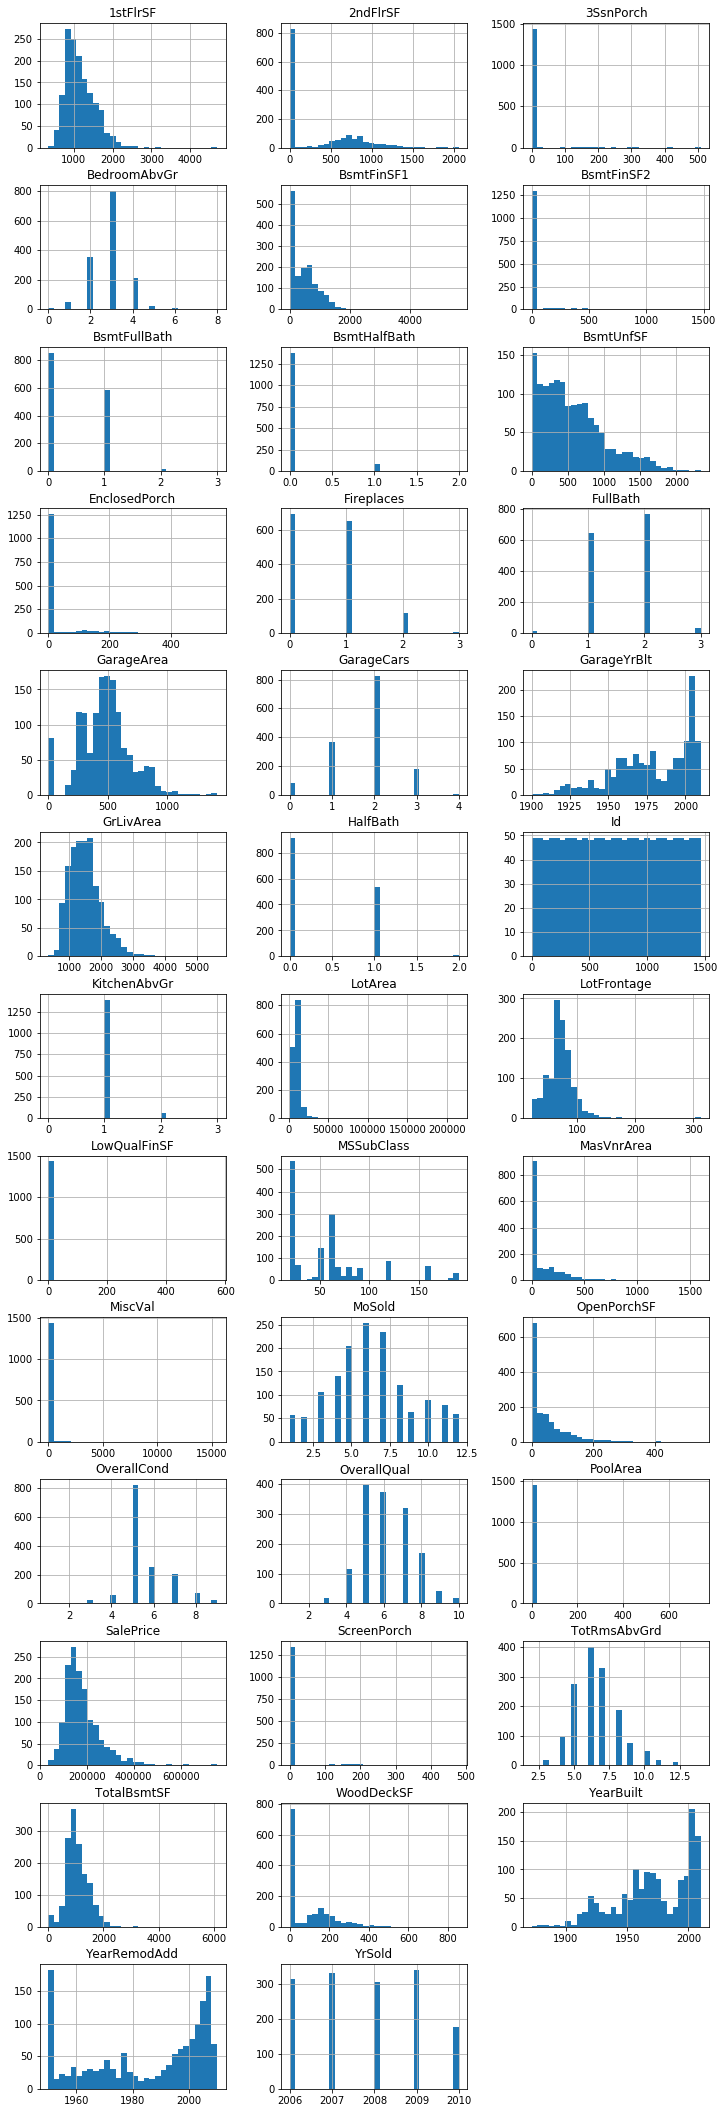

In [8]:
# Rough histograms of numerical features
n_num = train_raw.select_dtypes(exclude='object').shape[1]
train_raw.hist(figsize=(12, n_num), bins=30, 
               layout=(int(np.ceil(n_num / 3)), 3))
plt.show()

How to handle possible non-linear relationships???

    Feature engineering brainstorm:
    * Add / convert features?
        1stFlrSF -> log(1stFlrSF)
        
    * Add / convert numeric to yes/no or multiple categories?
        Fireplaces -> Fireplace, 2nd Fireplace, 3+ Fireplace


How to handle correlated features???

      2nfFlrSF=0 shows up in HouseStyle
      
      GarageArea to GarageCars
      
      SF to TotRmsAbvGrd to BedRoomAbvGr
      
      1stFlrSF + 2ndFlrSF = GrLivArea ???
      
      BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSf = TotalBsmtSF ???
      
      
How to handle features that are largely 0 or NA???

      Porch features
      BsmtFinSF2
      
    
YearRemodAdd

    info says same as construction date if no remodel, but spike at 1950
    it seems that data for remodeling before 1950 was not available 
    and was recorded as a 1950 remodeling (see cell below) 

In [67]:
train_raw[['YearBuilt', 'YearRemodAdd']]
#train_raw['YearRemodAdd'].hist(bins=60)
#plt.show()
#train_raw[['YearBuilt', 'YearRemodAdd']].sort_values(by='YearRemodAdd').head(20)

# Test if any houses where built before remodeling (per the data)
print((train_raw['YearBuilt'] > train_raw['YearRemodAdd']).any())

# Test if any houses built before 1950 were remodeled in a year other than 1950
# (per the data)
display(train_raw[['YearBuilt', 'YearRemodAdd']]
 .loc[(train_raw['YearBuilt'] < 1950) & (train_raw['YearRemodAdd'] < 1950)]
 .sort_values(by='YearRemodAdd')
)

display(train_raw[['YearBuilt', 'YearRemodAdd']]
 .loc[(train_raw['YearBuilt'] < 1950) & (train_raw['YearRemodAdd'] == 1950)]
 .sort_values(by='YearRemodAdd')
)

display(train_raw[['YearBuilt', 'YearRemodAdd']]
 .loc[(train_raw['YearBuilt'] < 1950) & (train_raw['YearRemodAdd'] > 1950)]
 .sort_values(by='YearRemodAdd')
)

False


,YearBuilt,YearRemodAdd


,YearBuilt,YearRemodAdd
8,1931,1950
1028,1941,1950
1034,1938,1950
1059,1932,1950
...,...,...
563,1918,1950
565,1915,1950
576,1928,1950
1443,1916,1950


,YearBuilt,YearRemodAdd
935,1926,1953
268,1940,1955
976,1923,1958
1332,1938,1958
...,...,...
1385,1922,2007
48,1920,2008
1123,1947,2008
292,1949,2008


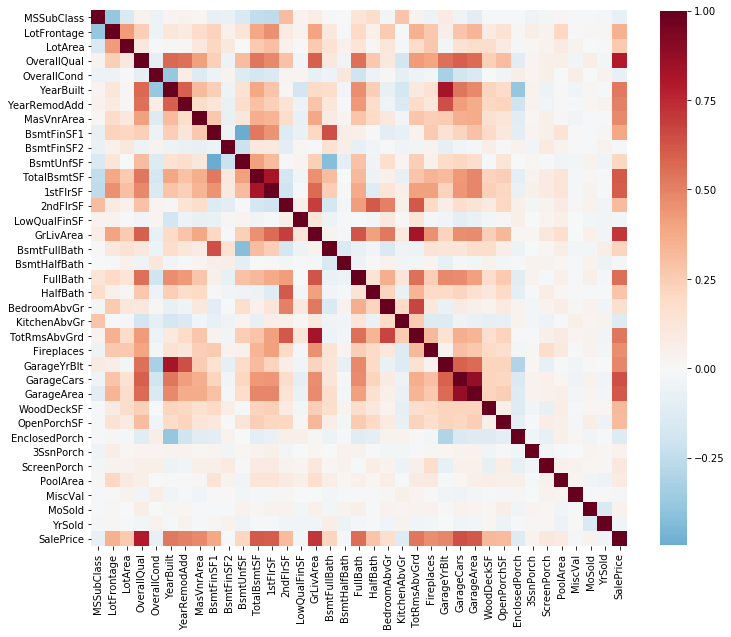

In [121]:
# Numerical Feature Correlations
fig = plt.figure(figsize=(12, 12))
ax = sns.heatmap(train_raw.drop('Id', axis=1).corr(),
                 annot=False,
                 cmap='RdBu_r',
                 center=0,
                 cbar_kws={'shrink':0.82}  # Rough match to axis scaling below
                )
ax.axis('scaled')  # equal x and y increments 
plt.show()

In [195]:
# Numerical features correlation with Sale Price

with pd.option_context('max_rows', None):
    display(train_raw.corr().loc[:, ['SalePrice']].sort_values(by='SalePrice'))

# Plot as heatmap
if False:
    fig = plt.figure(figsize=(12, 24))
    ax = sns.heatmap(train_raw.corr()
                              .loc[:, ['SalePrice']]
                              .sort_values(by='SalePrice'),
                     annot=True,
                     cmap='RdBu_r',
                     center=0,
                     cbar=False,
                     cbar_kws={'shrink':0.82}  # Rough match to axis scaling below
                    )
    ax.axis('scaled')  # equal x and y increments 
    plt.show()




,SalePrice
KitchenAbvGr,-0.136
EnclosedPorch,-0.129
MSSubClass,-0.084
OverallCond,-0.078
YrSold,-0.029
LowQualFinSF,-0.026
Id,-0.022
MiscVal,-0.021
BsmtHalfBath,-0.017
BsmtFinSF2,-0.011


In [ ]:


drop ID